1. Descartar variables innecesarias: Tipo de docuimento, Nacionalidad, estudiante_exterior, periodo, estudiante consecutivo, estu_estudiante, estu_pais_reside, discapacidades, municipio_reside, codigo depto, codigo muni, codigo del dane colegio termino, estu_cod_cole_mcpio_+termino, INST_COD_INSTITUCION, ESTU_SNIES_PRGMACADEMICO, ESTU_PRGM_CODMUNICIPIO, ESTU_INST_CODMUNICIPIO, ESTU_PRIVADO_LIBERTAD, ESTU_COD_MCPIO_PRESENTACION, ESTU_COD_DEPTO_PRESENTACION, MOD_INGLES_DESEM, ESTU_ESTADOINVESTIGACION

2. Transformar la fecha de nacimiento a la edad que tenia el estudiante en ese ano
3. Municipio residencia comparar con lugar dopnde estudia
4. Agrupar colegios por los que mas tienen y crear nueva cateogria para los poquitos y = con depto = eduacion papas y trabajo, INST_NOMBRE_INSTITUCION
5. juntas los dos colegios, crear nueva categoria

6. Imputar
7. Matriz de correlacion
8. Analizamos cuales dejar y culaes no
9. Creamos dummyes
10. Generamos modelo
11. Analizar P-value y volver a entrenar


In [411]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statistics import mode
import statsmodels.api as sm
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [412]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [413]:
df = pd.read_csv('data/TyT/Resultados_Saber_TyT_Gen_ricas_2020-1.csv')

C:\Users\David\AppData\Local\Temp\ipykernel_17628\1842402721.py:1: DtypeWarning:

Columns (9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.



In [414]:
df.describe(include="all")

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DISC_FISICA,ESTU_DISC_SISTEM,ESTU_DISC_AUDITCASTELL,ESTU_DISC_AUDITLSC,ESTU_DISC_VISUALCEGUE,ESTU_DISC_VISUALBAJA,ESTU_DISC_VOZHABLA,ESTU_DISC_INTELEC,ESTU_DISC_ESPAUTISTA,ESTU_DISC_PSICOSOCIAL,ESTU_DISC_ASPERGER,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_ESTADOINVESTIGACION
count,68725,68725,68597,68667,68725,68725.0,68725,68725,68725,27,3,8,8,1,10,1,3,1,2,2,68688,68688.000000,68688,68688.00000,58499,58190,37609,3.760900e+04,37609.000000,11543,58465,58461,58461,58463,58461,58475,57799,58465,65210,65100,56760,60492,64573,64460,64325,64056,64006,63846,63817,63840,63783,63863,63706,63606,68725.000000,68725,68725,68661.000000,68725,68725.00000,68725,68725,68725,68725,68725,68725.000000,68725,68725,68725,68725,68725,68725.000000,68725,68725,68725.000000,68725.000000,68567.000000,68566.000000,68725.000000,68567.000000,68566.000000,68725.000000,68567.000000,68566.000000,68705.000000,68705,68567.000000,68566.000000,67851.000000,58108.000000,67696.000000,67695.000000,68725.000000,68567.000000,68566.000000,68725
unique,6,17,2,10735,1,NaN,68725,1,17,1,1,1,1,1,1,1,1,1,1,1,34,NaN,913,NaN,2,4,7201,NaN,NaN,9655,3,2,2,2,2,3,5,12,12,12,13,13,7,2,2,2,2,2,2,2,2,6,7,5,NaN,184,982,NaN,20,NaN,136,32,2,3,50,NaN,51,25,5,6,1,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,CC,COLOMBIA,M,09/21/2000 12:00:00 AM,NO,NaN,EK202010002443,ESTUDIANTE,COLOMBIA,x,x,x,x,x,x,x,x,x,x,x,BOGOTÁ,NaN,BOGOTÁ D.C.,NaN,Cabecera Municipal,Soltero,INST EDUC CEFA,NaN,NaN,otro,Bachiller académico,No,No,No,No,Repasó por cuenta propia,TI,04,Primaria incompleta,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Estrato 2,Si,Si,Si,Si,No,No,No,No,3 o 4,No pago semestre,Más de 30 horas,NaN,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,NaN,TECNOLÓGICO EN ADMINISTRACIÓN Y TURISMO,NaN,BOGOTÁ D.C.,BOGOTÁ,TECNOLOGÍA,PRESENCIAL,ADMINISTRACIÓN,NaN,BOGOTÁ D.C.,BOGOTÁ,INSTITUCIÓN TECNOLÓGICA,OFICIAL NACIONAL,N,NaN,BOGOTÁ D.C.,BOGOTÁ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PUBLICAR
freq,67218,68663,34798,45,68725,NaN,1,68725,68663,27,3,8,8,1,10,1,

# 1. Eliminar datos irrelevantes

In [415]:
def delete_columns(array=None, data_frame = pd.DataFrame):
    if array is None:
        array = []
    for column in array:
        data_frame = data_frame.drop(column, axis=1)
    return data_frame

In [416]:
drop_columns = [
    'ESTU_TIPODOCUMENTO',
    'ESTU_NACIONALIDAD',
    'ESTU_EXTERIOR',
    'PERIODO',
    'ESTU_CONSECUTIVO',
    'ESTU_ESTUDIANTE',
    'ESTU_PAIS_RESIDE',
    'ESTU_DISC_FISICA',
    'ESTU_DISC_SISTEM',
    'ESTU_DISC_AUDITCASTELL',
    'ESTU_DISC_AUDITLSC',
    'ESTU_DISC_VISUALCEGUE',
    'ESTU_DISC_VISUALBAJA',
    'ESTU_DISC_VOZHABLA',
    'ESTU_DISC_INTELEC',
    'ESTU_DISC_ESPAUTISTA',
    'ESTU_DISC_PSICOSOCIAL',
    'ESTU_DISC_ASPERGER',
    'ESTU_COD_RESIDE_DEPTO',
    'ESTU_COD_RESIDE_MCPIO',
    'ESTU_CODDANE_COLE_TERMINO',
    'ESTU_COD_COLE_MCPIO_TERMINO',
    'INST_COD_INSTITUCION',
    'ESTU_SNIES_PRGMACADEMICO',
    'ESTU_PRGM_CODMUNICIPIO',
    'ESTU_INST_CODMUNICIPIO',
    'ESTU_PRIVADO_LIBERTAD',
    'ESTU_COD_MCPIO_PRESENTACION',
    'ESTU_COD_DEPTO_PRESENTACION',
    'MOD_INGLES_DESEM',
    'ESTU_ESTADOINVESTIGACION'
]

In [417]:
df = delete_columns(drop_columns, df)

In [418]:
df.describe(include='all')

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC
count,68597,68667,68688,68688,58499,58190,37609,11543,58465,58461,58461,58463,58461,58475,57799,58465,65210,65100,56760,60492,64573,64460,64325,64056,64006,63846,63817,63840,63783,63863,63706,63606,68725,68725,68725,68725,68725,68725,68725,68725,68725,68725,68725,68725,68725,68725,68725.000000,68567.000000,68566.000000,68725.000000,68567.000000,68566.000000,68725.000000,68567.000000,68566.000000,68705.000000,68567.000000,68566.000000,67851.000000,58108.000000,67696.000000,67695.000000,68725.000000,68567.000000,68566.000000
unique,2,10735,34,913,2,4,7201,9655,3,2,2,2,2,3,5,12,12,12,13,13,7,2,2,2,2,2,2,2,2,6,7,5,184,982,20,136,32,2,3,50,51,25,5,6,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,09/21/2000 12:00:00 AM,BOGOTÁ,BOGOTÁ D.C.,Cabecera Municipal,Soltero,INST EDUC CEFA,otro,Bachiller académico,No,No,No,No,Repasó por cuenta propia,TI,04,Primaria incompleta,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Estrato 2,Si,Si,Si,Si,No,No,No,No,3 o 4,No pago semestre,Más de 30 horas,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,TECNOLÓGICO EN ADMINISTRACIÓN Y TURISMO,BOGOTÁ D.C.,BOGOTÁ,TECNOLOGÍA,PRESENCIAL,ADMINISTRACIÓN,BOGOTÁ D.C.,BOGOTÁ,INSTITUCIÓN TECNOLÓGICA,OFICIAL NACIONAL,BOGOTÁ D.C.,BOGOTÁ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,34798,45,19894,19894,49073,45727,112,20,39880,48219,52463,42734,40894,42010,35827,22153,16636,16254,9853,29324,29672,56479,47240,55896,51383,38286,52603,39694,53110,30518,40140,26619,45486,3261,29267,24912,24912,61358,60443,23765,56978,56978,49340,51598,67962,67962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.526722,50.498811,50.479538,95.095773,50.498666,50.479655,98.523812,50.508962,50.486349,98.885540,50.528782,50.527127,85.041694,2.364528,43.368057,43.357235,93.195213,50.359532,50.347373
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.434051,28.866276,28.864958,24.501281,28.866466,28.864833,26.568043,28.849070,28.853207,27.973161,28.816013,28.786199,39.185355,0.881568,31.849521,31.840599,20.098347,28.869373,28.868413
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [419]:
df.head(5)

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC
0,M,09/16/1986 12:00:00 AM,CALDAS,MANIZALES,Cabecera Municipal,Unión libre,NaN,colegio anglo frances,Bachiller académico,No,No,No,Si,Repasó por cuenta propia,CC,08,Educación profesional incompleta,Secundaria (Bachillerato) completa,No sabe,Es dueño de un negocio pequeño (tiene pocos em...,Estrato 3,Si,Si,Si,Si,Si,Si,No,No,2,Entre un millon y 3 millones de pesose,Más de 30 horas,CORPORACION UNIVERSITARIA DE SANTA ROSA DE CAB...,TECNOLOGIA EN PRODUCCION ANIMAL,TECNOLÓGICO EN CIENCIAS AGROPECUARIAS,SANTA ROSA DE CABAL,RISARALDA,TECNOLOGÍA,PRESENCIAL,ZOOTECNIA,SANTA ROSA DE CABAL,RISARALDA,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,BOGOTÁ D.C.,BOGOTÁ,84,43.0,56.0,86,36.0,52.0,105,57.0,68.0,55.0,5.0,9.0,0.0,NaN,1.0,1.0,66,9.0,17.0
1,F,01/12/1996 12:00:00 AM,RISARALDA,SANTA ROSA DE CABAL,Cabecera Municipal,Soltero,SE LORENCITA VILLEGAS - SEDE PRINCIPAL,NaN,Bachiller académico,No,Si,No,No,No realizó ninguna prueba de preparación,TI,06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORACION UNIVERSITARIA DE SANTA ROSA DE CAB...,TECNOLOGIA EN DESARROLLO DE SISTEMAS INFORM¿TICOS,TECNOLÓGICO EN TIC,SANTA ROSA DE CABAL,RISARALDA,TECNOLOGÍA,PRESENCIAL,"INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES",SANTA ROSA DE CABAL,RISARALDA,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,BOGOTÁ D.C.,BOGOTÁ,107,77.0,68.0,139,98.0,96.0,98,47.0,41.0,108.0,63.0,50.0,134.0,4.0,95.0,93.0,117,89.0,83.0
2,M,01/28/1992 12:00:00 AM,CORDOBA,BUENAVISTA,Cabecera Municipal,Soltero,IE MARISCAL SUCRE,NaN,Bachiller académico,No,No,Si,No,No realizó ninguna prueba de preparación,TI,06,Postgrado,Secundaria (Bachillerato) incompleta,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Estrato 1,No,Si,No,Si,No,No,Si,No,3 o 4,Entre un millon y 3 millones de pesose,Menos de 10 horas,UNIVERSIDAD AUTONOMA DE BUCARAMANGA-UNAB-BUCAR...,TECNOLOGÍA EN REGENCIA DE FARMACIA,"TECNOLÓGICO EN INGENIERÍA, INDUSTRIA Y MINAS",BUCARAMANGA,SANTANDER,TECNOLOGÍA,DISTANCIA VITUAL,QUÍMICA Y AFINES,BUCARAMANGA,SANTANDER,UNIVERSIDAD,NO OFICIAL - CORPORACIÓN,BOGOTÁ D.C.,BOGOTÁ,69,20.0,17.0,86,36.0,28.0,92,39.0,35.0,54.0,5.0,3.0,0.0,NaN,1.0,1.0,60,6.0,4.0
3,M,12/02/1981 12:00:00 AM,NARIÑO,SAPUYES,Area Rural,Casado,SEDE 1 INSTITUCIÓN EDUCATIVA SEBASTIÁN DE BELA...,NaN,Bachiller académico,No,Si,No,Si,Repasó por cuenta propia,TI,06,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",Estrato 1,Si,No,Si,No,No,No,Si,No,3 o 4,Entre un

Vamos a cambiar de fecha a edad en cada estudiante

In [420]:
def convert_age(data_frame = pd.DataFrame):
    #Definimos la fecha por defecto que en este caso sera el dia en que se presentaron las pruebas ese aanio agosto 1
    fecha_default = datetime(2020,8,1)
    #Obtenemos solo la fecha
    data_frame = data_frame.replace(r'\s.*', '', regex=True)
    data_frame = pd.to_datetime(data_frame, format='%m/%d/%Y', errors='coerce')
    #Agregamos la fecha por defecto a los datos que no tengan fecha
    data_frame.fillna(fecha_default, inplace=True)
    #Calculamos la edad
    data_frame = (fecha_default - data_frame).dt.days // 365
    return  data_frame

In [421]:
df['ESTU_FECHANACIMIENTO'] = convert_age(df['ESTU_FECHANACIMIENTO'])
df.rename(columns={'ESTU_FECHANACIMIENTO': 'EDAD'}, inplace=True)

Se va a crear una nueva columna que va a tener el resultado de comparar si el estudiante estudia en el mismo municipio donde vive

In [422]:
df['MCPIO_VIVE_ESTUDIA'] = df['ESTU_MCPIO_RESIDE'] == df['ESTU_PRGM_MUNICIPIO']
df.head(5)

,ESTU_GENERO,EDAD,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,MCPIO_VIVE_ESTUDIA
0,M,33,CALDAS,MANIZALES,Cabecera Municipal,Unión libre,NaN,colegio anglo frances,Bachiller académico,No,No,No,Si,Repasó por cuenta propia,CC,08,Educación profesional incompleta,Secundaria (Bachillerato) completa,No sabe,Es dueño de un negocio pequeño (tiene pocos em...,Estrato 3,Si,Si,Si,Si,Si,Si,No,No,2,Entre un millon y 3 millones de pesose,Más de 30 horas,CORPORACION UNIVERSITARIA DE SANTA ROSA DE CAB...,TECNOLOGIA EN PRODUCCION ANIMAL,TECNOLÓGICO EN CIENCIAS AGROPECUARIAS,SANTA ROSA DE CABAL,RISARALDA,TECNOLOGÍA,PRESENCIAL,ZOOTECNIA,SANTA ROSA DE CABAL,RISARALDA,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,BOGOTÁ D.C.,BOGOTÁ,84,43.0,56.0,86,36.0,52.0,105,57.0,68.0,55.0,5.0,9.0,0.0,NaN,1.0,1.0,66,9.0,17.0,False
1,F,24,RISARALDA,SANTA ROSA DE CABAL,Cabecera Municipal,Soltero,SE LORENCITA VILLEGAS - SEDE PRINCIPAL,NaN,Bachiller académico,No,Si,No,No,No realizó ninguna prueba de preparación,TI,06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORACION UNIVERSITARIA DE SANTA ROSA DE CAB...,TECNOLOGIA EN DESARROLLO DE SISTEMAS INFORM¿TICOS,TECNOLÓGICO EN TIC,SANTA ROSA DE CABAL,RISARALDA,TECNOLOGÍA,PRESENCIAL,"INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES",SANTA ROSA DE CABAL,RISARALDA,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,BOGOTÁ D.C.,BOGOTÁ,107,77.0,68.0,139,98.0,96.0,98,47.0,41.0,108.0,63.0,50.0,134.0,4.0,95.0,93.0,117,89.0,83.0,True
2,M,28,CORDOBA,BUENAVISTA,Cabecera Municipal,Soltero,IE MARISCAL SUCRE,NaN,Bachiller académico,No,No,Si,No,No realizó ninguna prueba de preparación,TI,06,Postgrado,Secundaria (Bachillerato) incompleta,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Estrato 1,No,Si,No,Si,No,No,Si,No,3 o 4,Entre un millon y 3 millones de pesose,Menos de 10 horas,UNIVERSIDAD AUTONOMA DE BUCARAMANGA-UNAB-BUCAR...,TECNOLOGÍA EN REGENCIA DE FARMACIA,"TECNOLÓGICO EN INGENIERÍA, INDUSTRIA Y MINAS",BUCARAMANGA,SANTANDER,TECNOLOGÍA,DISTANCIA VITUAL,QUÍMICA Y AFINES,BUCARAMANGA,SANTANDER,UNIVERSIDAD,NO OFICIAL - CORPORACIÓN,BOGOTÁ D.C.,BOGOTÁ,69,20.0,17.0,86,36.0,28.0,92,39.0,35.0,54.0,5.0,3.0,0.0,NaN,1.0,1.0,60,6.0,4.0,False
3,M,38,NARIÑO,SAPUYES,Area Rural,Casado,SEDE 1 INSTITUCIÓN EDUCATIVA SEBASTIÁN DE BELA...,NaN,Bachiller académico,No,Si,No,Si,Repasó por cuenta propia,TI,06,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",Estrato 1,Si,No,Si,No,No,No,Si,No,3 o 4,Entre un millon y 3 millones de pesose,Menos de 10 horas,UNIVERSIDAD

In [423]:
df_vive_estudia = pd.get_dummies(df[['MCPIO_VIVE_ESTUDIA']],prefix='MCPIO_VIVE_ESTUDIA').astype(int)
df['MCPIO_VIVE_ESTUDIA'] = df_vive_estudia
df.head(5)

,ESTU_GENERO,EDAD,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,MCPIO_VIVE_ESTUDIA
0,M,33,CALDAS,MANIZALES,Cabecera Municipal,Unión libre,NaN,colegio anglo frances,Bachiller académico,No,No,No,Si,Repasó por cuenta propia,CC,08,Educación profesional incompleta,Secundaria (Bachillerato) completa,No sabe,Es dueño de un negocio pequeño (tiene pocos em...,Estrato 3,Si,Si,Si,Si,Si,Si,No,No,2,Entre un millon y 3 millones de pesose,Más de 30 horas,CORPORACION UNIVERSITARIA DE SANTA ROSA DE CAB...,TECNOLOGIA EN PRODUCCION ANIMAL,TECNOLÓGICO EN CIENCIAS AGROPECUARIAS,SANTA ROSA DE CABAL,RISARALDA,TECNOLOGÍA,PRESENCIAL,ZOOTECNIA,SANTA ROSA DE CABAL,RISARALDA,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,BOGOTÁ D.C.,BOGOTÁ,84,43.0,56.0,86,36.0,52.0,105,57.0,68.0,55.0,5.0,9.0,0.0,NaN,1.0,1.0,66,9.0,17.0,0
1,F,24,RISARALDA,SANTA ROSA DE CABAL,Cabecera Municipal,Soltero,SE LORENCITA VILLEGAS - SEDE PRINCIPAL,NaN,Bachiller académico,No,Si,No,No,No realizó ninguna prueba de preparación,TI,06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORACION UNIVERSITARIA DE SANTA ROSA DE CAB...,TECNOLOGIA EN DESARROLLO DE SISTEMAS INFORM¿TICOS,TECNOLÓGICO EN TIC,SANTA ROSA DE CABAL,RISARALDA,TECNOLOGÍA,PRESENCIAL,"INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES",SANTA ROSA DE CABAL,RISARALDA,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,BOGOTÁ D.C.,BOGOTÁ,107,77.0,68.0,139,98.0,96.0,98,47.0,41.0,108.0,63.0,50.0,134.0,4.0,95.0,93.0,117,89.0,83.0,1
2,M,28,CORDOBA,BUENAVISTA,Cabecera Municipal,Soltero,IE MARISCAL SUCRE,NaN,Bachiller académico,No,No,Si,No,No realizó ninguna prueba de preparación,TI,06,Postgrado,Secundaria (Bachillerato) incompleta,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Estrato 1,No,Si,No,Si,No,No,Si,No,3 o 4,Entre un millon y 3 millones de pesose,Menos de 10 horas,UNIVERSIDAD AUTONOMA DE BUCARAMANGA-UNAB-BUCAR...,TECNOLOGÍA EN REGENCIA DE FARMACIA,"TECNOLÓGICO EN INGENIERÍA, INDUSTRIA Y MINAS",BUCARAMANGA,SANTANDER,TECNOLOGÍA,DISTANCIA VITUAL,QUÍMICA Y AFINES,BUCARAMANGA,SANTANDER,UNIVERSIDAD,NO OFICIAL - CORPORACIÓN,BOGOTÁ D.C.,BOGOTÁ,69,20.0,17.0,86,36.0,28.0,92,39.0,35.0,54.0,5.0,3.0,0.0,NaN,1.0,1.0,60,6.0,4.0,0
3,M,38,NARIÑO,SAPUYES,Area Rural,Casado,SEDE 1 INSTITUCIÓN EDUCATIVA SEBASTIÁN DE BELA...,NaN,Bachiller académico,No,Si,No,Si,Repasó por cuenta propia,TI,06,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",Estrato 1,Si,No,Si,No,No,No,Si,No,3 o 4,Entre un millon y 3 millones de pesose,Menos de 10 horas,UNIVERSIDAD AUTONOMA D

In [424]:
df.dtypes

ESTU_GENERO                        object
EDAD                                int64
ESTU_DEPTO_RESIDE                  object
ESTU_MCPIO_RESIDE                  object
ESTU_AREARESIDE                    object
ESTU_ESTADOCIVIL                   object
ESTU_COLE_TERMINO                  object
ESTU_OTROCOLE_TERMINO              object
ESTU_TITULOOBTENIDOBACHILLER       object
ESTU_PAGOMATRICULABECA             object
ESTU_PAGOMATRICULACREDITO          object
ESTU_PAGOMATRICULAPADRES           object
ESTU_PAGOMATRICULAPROPIO           object
ESTU_COMOCAPACITOEXAMENSB11        object
ESTU_TIPODOCUMENTOSB11             object
ESTU_SEMESTRECURSA                 object
FAMI_EDUCACIONPADRE                object
FAMI_EDUCACIONMADRE                object
FAMI_TRABAJOLABORPADRE             object
FAMI_TRABAJOLABORMADRE             object
FAMI_ESTRATOVIVIENDA               object
FAMI_TIENEINTERNET                 object
FAMI_TIENESERVICIOTV               object
FAMI_TIENECOMPUTADOR              

Imputamos datos unicamente para construir el modelo base

In [425]:
def imputar(dataframe = pd.DataFrame):
    for column in dataframe:
        if dataframe[column].dtype == 'O':
            dataframe[column].fillna('SIN_CATEGORIA', inplace=True)
        else:
            dataframe[column].fillna(0, inplace=True)
    return dataframe

In [426]:
df = imputar(df)

In [427]:
df

,ESTU_GENERO,EDAD,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,MCPIO_VIVE_ESTUDIA
0,M,33,CALDAS,MANIZALES,Cabecera Municipal,Unión libre,SIN_CATEGORIA,colegio anglo frances,Bachiller académico,No,No,No,Si,Repasó por cuenta propia,CC,08,Educación profesional incompleta,Secundaria (Bachillerato) completa,No sabe,Es dueño de un negocio pequeño (tiene pocos em...,Estrato 3,Si,Si,Si,Si,Si,Si,No,No,2,Entre un millon y 3 millones de pesose,Más de 30 horas,CORPORACION UNIVERSITARIA DE SANTA ROSA DE CAB...,TECNOLOGIA EN PRODUCCION ANIMAL,TECNOLÓGICO EN CIENCIAS AGROPECUARIAS,SANTA ROSA DE CABAL,RISARALDA,TECNOLOGÍA,PRESENCIAL,ZOOTECNIA,SANTA ROSA DE CABAL,RISARALDA,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,BOGOTÁ D.C.,BOGOTÁ,84,43.0,56.0,86,36.0,52.0,105,57.0,68.0,55.0,5.0,9.0,0.0,0.0,1.0,1.0,66,9.0,17.0,0
1,F,24,RISARALDA,SANTA ROSA DE CABAL,Cabecera Municipal,Soltero,SE LORENCITA VILLEGAS - SEDE PRINCIPAL,SIN_CATEGORIA,Bachiller académico,No,Si,No,No,No realizó ninguna prueba de preparación,TI,06,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,CORPORACION UNIVERSITARIA DE SANTA ROSA DE CAB...,TECNOLOGIA EN DESARROLLO DE SISTEMAS INFORM¿TICOS,TECNOLÓGICO EN TIC,SANTA ROSA DE CABAL,RISARALDA,TECNOLOGÍA,PRESENCIAL,"INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES",SANTA ROSA DE CABAL,RISARALDA,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,BOGOTÁ D.C.,BOGOTÁ,107,77.0,68.0,139,98.0,96.0,98,47.0,41.0,108.0,63.0,50.0,134.0,4.0,95.0,93.0,117,89.0,83.0,1
2,M,28,CORDOBA,BUENAVISTA,Cabecera Municipal,Soltero,IE MARISCAL SUCRE,SIN_CATEGORIA,Bachiller académico,No,No,Si,No,No realizó ninguna prueba de preparación,TI,06,Postgrado,Secundaria (Bachillerato) incompleta,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Estrato 1,No,Si,No,Si,No,No,Si,No,3 o 4,Entre un millon y 3 millones de pesose,Menos de 10 horas,UNIVERSIDAD AUTONOMA DE BUCARAMANGA-UNAB-BUCAR...,TECNOLOGÍA EN REGENCIA DE FARMACIA,"TECNOLÓGICO EN INGENIERÍA, INDUSTRIA Y MINAS",BUCARAMANGA,SANTANDER,TECNOLOGÍA,DISTANCIA VITUAL,QUÍMICA Y AFINES,BUCARAMANGA,SANTANDER,UNIVERSIDAD,NO OFICIAL - CORPORACIÓN,BOGOTÁ D.C.,BOGOTÁ,69,20.0,17.0,86,36.0,28.0,92,39.0,35.0,54.0,5.0,3.0,0.0,0.0,1.0,1.0,60,6.0,4.0,0
3,M,38,NARIÑO,SAPUYES,Area Rural,Casado,SEDE 1 INSTITUCIÓN EDUCATIVA SEBASTIÁN DE BELA...,SIN_CATEGORIA,Bachiller académico,No,Si,No,Si,Repasó por cuenta propia,TI,06,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,"Trabaj

Ahora vamos a crear una matriz de correlacion para identificar que datos son mas importantes que otros, para eso vamos a obtener unicamente las variables numericas

In [428]:
df_numeric_types = df.select_dtypes(include=['number'])
df_numeric_types.drop('MCPIO_VIVE_ESTUDIA', axis=1, inplace=True)
df_numeric_types

,EDAD,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC
0,33,84,43.0,56.0,86,36.0,52.0,105,57.0,68.0,55.0,5.0,9.0,0.0,0.0,1.0,1.0,66,9.0,17.0
1,24,107,77.0,68.0,139,98.0,96.0,98,47.0,41.0,108.0,63.0,50.0,134.0,4.0,95.0,93.0,117,89.0,83.0
2,28,69,20.0,17.0,86,36.0,28.0,92,39.0,35.0,54.0,5.0,3.0,0.0,0.0,1.0,1.0,60,6.0,4.0
3,38,56,7.0,5.0,89,40.0,32.0,69,14.0,12.0,85.0,25.0,26.0,103.0,3.0,55.0,51.0,80,27.0,22.0
4,46,102,71.0,75.0,108,69.0,70.0,112,67.0,67.0,108.0,64.0,65.0,149.0,4.0,98.0,97.0,116,87.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68720,20,134,98.0,99.0,140,98.0,98.0,124,83.0,83.0,132.0,91.0,92.0,81.0,1.0,17.0,16.0,122,93.0,94.0
68721,20,111,83.0,86.0,108,69.0,70.0,116,73.0,73.0,101.0,53.0,53.0,92.0,2.0,46.0,43.0,106,72.0,73.0
68722,20,83,40.0,43.0,97,52.0,52.0,103,54.0,54.0,104.0,56.0,57.0,84.0,2.0,27.0,25.0,94,51.0,51.0
68723,19,85,43.0,46.0,87,37.0,36.0,93,40.0,38.0,93.0,38.0,39.0,80.0,1.0,17.0,15.0,88,39.0,39.0


In [429]:
df_numeric_types.corr()

,EDAD,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC
EDAD,1.000000,-0.026691,-0.030745,-0.031527,-0.013294,-0.014857,-0.022247,0.056239,0.059771,0.051392,-0.075525,-0.080511,-0.085709,-0.007223,-0.005208,-0.002900,-0.008281,-0.018231,-0.019699,-0.027293
MOD_RAZONA_CUANTITAT_PUNT,-0.026691,1.000000,0.984146,0.956031,0.647398,0.650870,0.626838,0.563959,0.588211,0.566723,0.383495,0.443228,0.414810,0.220062,0.255705,0.273987,0.271740,0.724705,0.726559,0.700497
MOD_RAZONA_CUANTITATIVO_PNAL,-0.030745,0.984146,1.000000,0.969720,0.643846,0.656266,0.631826,0.561213,0.592711,0.570939,0.376056,0.443986,0.415213,0.220737,0.257206,0.278187,0.275860,0.717583,0.733059,0.706304
MOD_RAZONA_CUANTITATIVO_PNBC,-0.031527,0.956031,0.969720,1.000000,0.625491,0.636971,0.646885,0.547604,0.577539,0.584230,0.352081,0.414442,0.426143,0.216782,0.254940,0.277190,0.278544,0.694978,0.709491,0.724401
MOD_LECTURA_CRITICA_PUNT,-0.013294,0.647398,0.643846,0.625491,1.000000,0.976028,0.958139,0.723088,0.727015,0.706330,0.458571,0.496766,0.470865,0.224043,0.260493,0.281120,0.274848,0.796650,0.785109,0.764403
MOD_LECTURA_CRITICA_PNAL,-0.014857,0.650870,0.656266,0.636971,0.976028,1.000000,0.979836,0.708327,0.738418,0.716441,0.439400,0.501464,0.474327,0.228914,0.267226,0.290804,0.284399,0.784029,0.799008,0.776619
MOD_LECTURA_CRITICA_PNBC,-0.022247,0.626838,0.631826,0.646885,0.958139,0.979836,1.000000,0.690522,0.718560,0.727890,0.414148,0.469844,0.483281,0.221782,0.260332,0.283981,0.285198,0.759724,0.773159,0.790323
MOD_COMPETEN_CIUDADA_PUNT,0.056239,0.563959,0.561213,0.547604,0.723088,0.708327,0.690522,1.000000,0.965982,0.951665,0.564726,0.532280,0.512480,0.202121,0.238803,0.259467,0.253415,0.804521,0.786201,0.770539
MOD_COMPETEN_CIUDADA_PNAL,0.059771,0.588211,0.592711,0.577539,0.727015,0.738418,0.718560,0.965982,1.000000,0.983229,0.520470,0.537511,0.515895,0.214959,0.254197,0.278693,0.272281,0.794462,0.807192,0.789356
MOD_COMPETEN_CIUDADA_PNBC,0.051392,0.566723,0.570939,0.584230,0.706330,0.716441,0.727890,0.951665,0.983229,1.000000,0.499471,0.510628,0.523759,0.207691,0.247018,0.271454,0.272502,0.772085,0.783345,0.800277


vamos a agrupar todas las variables categoricas en grupos para poder crear las dummies ya que si no se agrupan seran mucha cantidad de columnas nuevas que se creen

In [430]:
df['ESTU_MCPIO_RESIDE'].value_counts()

ESTU_MCPIO_RESIDE
BOGOTÁ D.C.            19894
MEDELLÍN                4617
CARTAGENA DE INDIAS     2843
CALI                    2227
SOACHA                  1777
                       ...  
TITIRIBÍ                   1
ALGARROBO                  1
TENERIFE                   1
LA PRIMAVERA               1
GUATAQUÍ                   1
Name: count, Length: 914, dtype: int64

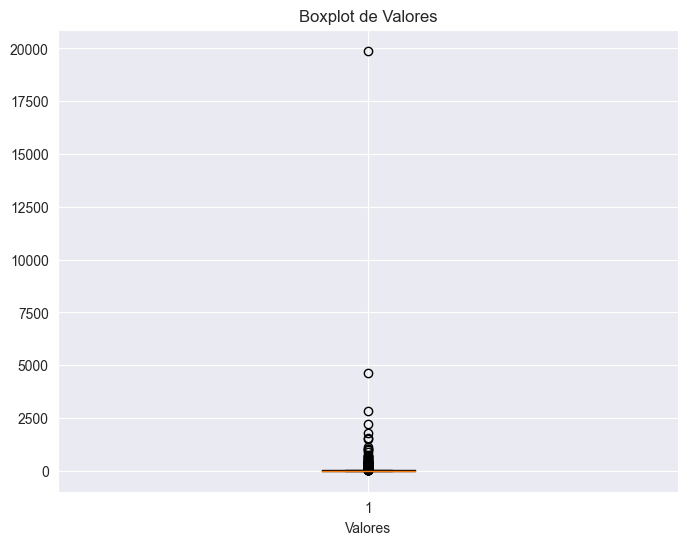

In [431]:
plt.figure(figsize=(8, 6))  # Tamaño de la figura
plt.boxplot(df['ESTU_MCPIO_RESIDE'].value_counts().values)  # vert=False para hacer un boxplot horizontal
plt.title('Boxplot de Valores')  # Título del gráfico
plt.xlabel('Valores')  # Etiqueta del eje x
plt.show()

In [432]:
df.drop('ESTU_COLE_TERMINO', axis=1, inplace=True)
df.drop('ESTU_OTROCOLE_TERMINO', axis=1, inplace=True)
def group_categories(dataframe=pd.DataFrame):
    column_object = dataframe.select_dtypes(include=['object']).columns
    for item in column_object:
        if len(dataframe[item].unique()) > 4:
            quantiles = pd.qcut(dataframe[item].value_counts(), q=4, labels=['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4'])
            quantiles = pd.DataFrame({item: quantiles.index, f'GROUP_{item}': quantiles.values})
            dataframe = dataframe.merge(quantiles, on=item, how='left')
            dataframe.drop(item, axis=1, inplace=True)
    return dataframe

In [433]:
df = group_categories(df)

In [434]:
df

,ESTU_GENERO,EDAD,ESTU_AREARESIDE,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,MCPIO_VIVE_ESTUDIA,GROUP_ESTU_DEPTO_RESIDE,GROUP_ESTU_MCPIO_RESIDE,GROUP_ESTU_ESTADOCIVIL,GROUP_ESTU_TIPODOCUMENTOSB11,GROUP_ESTU_SEMESTRECURSA,GROUP_FAMI_EDUCACIONPADRE,GROUP_FAMI_EDUCACIONMADRE,GROUP_FAMI_TRABAJOLABORPADRE,GROUP_FAMI_TRABAJOLABORMADRE,GROUP_FAMI_ESTRATOVIVIENDA,GROUP_FAMI_CUANTOSCOMPARTEBAÑO,GROUP_ESTU_VALORMATRICULAUNIVERSIDAD,GROUP_ESTU_HORASSEMANATRABAJA,GROUP_INST_NOMBRE_INSTITUCION,GROUP_ESTU_PRGM_ACADEMICO,GROUP_GRUPOREFERENCIA,GROUP_ESTU_PRGM_MUNICIPIO,GROUP_ESTU_PRGM_DEPARTAMENTO,GROUP_ESTU_NUCLEO_PREGRADO,GROUP_ESTU_INST_MUNICIPIO,GROUP_ESTU_INST_DEPARTAMENTO,GROUP_INST_CARACTER_ACADEMICO,GROUP_INST_ORIGEN
0,M,33,Cabecera Municipal,Bachiller académico,No,No,No,Si,Repasó por cuenta propia,Si,Si,Si,Si,Si,Si,No,No,TECNOLOGÍA,PRESENCIAL,BOGOTÁ D.C.,BOGOTÁ,84,43.0,56.0,86,36.0,52.0,105,57.0,68.0,55.0,5.0,9.0,0.0,0.0,1.0,1.0,66,9.0,17.0,0,Grupo 3,Grupo 4,Grupo 2,Grupo 4,Grupo 2,Grupo 1,Grupo 4,Grupo 3,Grupo 4,Grupo 3,Grupo 4,Grupo 4,Grupo 4,Grupo 1,Grupo 1,Grupo 3,Grupo 1,Grupo 3,Grupo 2,Grupo 1,Grupo 3,Grupo 3,Grupo 4
1,F,24,Cabecera Municipal,Bachiller académico,No,Si,No,No,No realizó ninguna prueba de preparación,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,SIN_CATEGORIA,TECNOLOGÍA,PRESENCIAL,BOGOTÁ D.C.,BOGOTÁ,107,77.0,68.0,139,98.0,96.0,98,47.0,41.0,108.0,63.0,50.0,134.0,4.0,95.0,93.0,117,89.0,83.0,1,Grupo 3,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 3,Grupo 3,Grupo 4,Grupo 4,Grupo 3,Grupo 2,Grupo 3,Grupo 1,Grupo 1,Grupo 1,Grupo 4,Grupo 1,Grupo 3,Grupo 4,Grupo 1,Grupo 3,Grupo 3,Grupo 4
2,M,28,Cabecera Municipal,Bachiller académico,No,No,Si,No,No realizó ninguna prueba de preparación,No,Si,No,Si,No,No,Si,No,TECNOLOGÍA,DISTANCIA VITUAL,BOGOTÁ D.C.,BOGOTÁ,69,20.0,17.0,86,36.0,28.0,92,39.0,35.0,54.0,5.0,3.0,0.0,0.0,1.0,1.0,60,6.0,4.0,0,Grupo 2,Grupo 3,Grupo 4,Grupo 4,Grupo 4,Grupo 1,Grupo 4,Grupo 1,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 3,Grupo 4,Grupo 4,Grupo 1,Grupo 4
3,M,38,Area Rural,Bachiller académico,No,Si,No,Si,Repasó por cuenta propia,Si,No,Si,No,No,No,Si,No,TECNOLOGÍA,DISTANCIA VITUAL,BOGOTÁ D.C.,BOGOTÁ,56,7.0,5.0,89,40.0,32.0,69,14.0,12.0,85.0,25.0,26.0,103.0,3.0,55.0,51.0,80,27.0,22.0,0,Grupo 3,Grupo 2,Grupo 1,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 2,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 3,Grupo 4,Grupo 4,Grupo 1,Grupo 4
4,M,46,Cabecera Municipal,Bachiller académico,Si,No,No,No,No realizó ninguna prueba de preparación,Si,Si,No,Si,No,No,Si,No,TECNOLOGÍA,DISTANCIA VITUAL,BOGOTÁ D.C.,BOGOTÁ,102,71.0,75.0,108,69.0,70.0,112,67.0,67.0,108.0,64.0,65.0,149.0,4.0,98.0,97.0,116,87.0,88.0,0,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 3,Grupo 4,Grupo 3,Grupo 4,Grupo 2,Grupo 4,Grupo 3,Grupo 4,Grupo 3,Grupo 4,Grupo 3,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 4,Grupo 1,Grupo 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

El siguiente paso sera crear las dummies para cada variable categoria para poder obtener la matriz de correlacion de todos los datos y asi elegir que es lo que mas influye al puntaje del ingles

In [435]:
def create_all_dummies(dataframe = pd.DataFrame):
    categoric_columns = dataframe.select_dtypes(include=['category','object']).columns
    for category in categoric_columns:
        df_dummies = pd.get_dummies(dataframe[category], prefix=f'DUMMY_{category}', drop_first=True).astype(int)
        dataframe = pd.concat([dataframe, df_dummies], axis=1)
        dataframe.drop(category, axis=1, inplace=True)
    return dataframe

In [436]:
df.dtypes

ESTU_GENERO                               object
EDAD                                       int64
ESTU_AREARESIDE                           object
ESTU_TITULOOBTENIDOBACHILLER              object
ESTU_PAGOMATRICULABECA                    object
ESTU_PAGOMATRICULACREDITO                 object
ESTU_PAGOMATRICULAPADRES                  object
ESTU_PAGOMATRICULAPROPIO                  object
ESTU_COMOCAPACITOEXAMENSB11               object
FAMI_TIENEINTERNET                        object
FAMI_TIENESERVICIOTV                      object
FAMI_TIENECOMPUTADOR                      object
FAMI_TIENELAVADORA                        object
FAMI_TIENEHORNOMICROOGAS                  object
FAMI_TIENEAUTOMOVIL                       object
FAMI_TIENEMOTOCICLETA                     object
FAMI_TIENECONSOLAVIDEOJUEGOS              object
ESTU_NIVEL_PRGM_ACADEMICO                 object
ESTU_METODO_PRGM                          object
ESTU_MCPIO_PRESENTACION                   object
ESTU_DEPTO_PRESENTAC

In [437]:
df.columns.value_counts().sum()

64

In [438]:
df = create_all_dummies(df)

In [439]:
df

,EDAD,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,MCPIO_VIVE_ESTUDIA,DUMMY_ESTU_GENERO_M,DUMMY_ESTU_GENERO_SIN_CATEGORIA,DUMMY_ESTU_AREARESIDE_Cabecera Municipal,DUMMY_ESTU_AREARESIDE_SIN_CATEGORIA,DUMMY_ESTU_TITULOOBTENIDOBACHILLER_Bachiller pedagógico o normalista,DUMMY_ESTU_TITULOOBTENIDOBACHILLER_Bachiller técnico,DUMMY_ESTU_TITULOOBTENIDOBACHILLER_SIN_CATEGORIA,DUMMY_ESTU_PAGOMATRICULABECA_SIN_CATEGORIA,DUMMY_ESTU_PAGOMATRICULABECA_Si,DUMMY_ESTU_PAGOMATRICULACREDITO_SIN_CATEGORIA,DUMMY_ESTU_PAGOMATRICULACREDITO_Si,DUMMY_ESTU_PAGOMATRICULAPADRES_SIN_CATEGORIA,DUMMY_ESTU_PAGOMATRICULAPADRES_Si,DUMMY_ESTU_PAGOMATRICULAPROPIO_SIN_CATEGORIA,DUMMY_ESTU_PAGOMATRICULAPROPIO_Si,DUMMY_ESTU_COMOCAPACITOEXAMENSB11_Repasó por cuenta propia,DUMMY_ESTU_COMOCAPACITOEXAMENSB11_SIN_CATEGORIA,DUMMY_ESTU_COMOCAPACITOEXAMENSB11_Tomó un curso de preparación,DUMMY_FAMI_TIENEINTERNET_SIN_CATEGORIA,DUMMY_FAMI_TIENEINTERNET_Si,DUMMY_FAMI_TIENESERVICIOTV_SIN_CATEGORIA,DUMMY_FAMI_TIENESERVICIOTV_Si,DUMMY_FAMI_TIENECOMPUTADOR_SIN_CATEGORIA,DUMMY_FAMI_TIENECOMPUTADOR_Si,DUMMY_FAMI_TIENELAVADORA_SIN_CATEGORIA,DUMMY_FAMI_TIENELAVADORA_Si,DUMMY_FAMI_TIENEHORNOMICROOGAS_SIN_CATEGORIA,DUMMY_FAMI_TIENEHORNOMICROOGAS_Si,DUMMY_FAMI_TIENEAUTOMOVIL_SIN_CATEGORIA,DUMMY_FAMI_TIENEAUTOMOVIL_Si,DUMMY_FAMI_TIENEMOTOCICLETA_SIN_CATEGORIA,DUMMY_FAMI_TIENEMOTOCICLETA_Si,DUMMY_FAMI_TIENECONSOLAVIDEOJUEGOS_SIN_CATEGORIA,DUMMY_FAMI_TIENECONSOLAVIDEOJUEGOS_Si,DUMMY_ESTU_NIVEL_PRGM_ACADEMICO_TÉCNICO PROFESIONAL,DUMMY_ESTU_METODO_PRGM_DISTANCIA VITUAL,DUMMY_ESTU_METODO_PRGM_PRESENCIAL,DUMMY_ESTU_MCPIO_PRESENTACION_BOGOTÁ D.C.,DUMMY_ESTU_MCPIO_PRESENTACION_NILO,DUMMY_ESTU_DEPTO_PRESENTACION_BOGOTÁ,DUMMY_ESTU_DEPTO_PRESENTACION_CUNDINAMARCA,DUMMY_GROUP_ESTU_DEPTO_RESIDE_Grupo 2,DUMMY_GROUP_ESTU_DEPTO_RESIDE_Grupo 3,DUMMY_GROUP_ESTU_DEPTO_RESIDE_Grupo 4,DUMMY_GROUP_ESTU_MCPIO_RESIDE_Grupo 2,DUMMY_GROUP_ESTU_MCPIO_RESIDE_Grupo 3,DUMMY_GROUP_ESTU_MCPIO_RESIDE_Grupo 4,DUMMY_GROUP_ESTU_ESTADOCIVIL_Grupo 2,DUMMY_GROUP_ESTU_ESTADOCIVIL_Grupo 3,DUMMY_GROUP_ESTU_ESTADOCIVIL_Grupo 4,DUMMY_GROUP_ESTU_TIPODOCUMENTOSB11_Grupo 2,DUMMY_GROUP_ESTU_TIPODOCUMENTOSB11_Grupo 3,DUMMY_GROUP_ESTU_TIPODOCUMENTOSB11_Grupo 4,DUMMY_GROUP_ESTU_SEMESTRECURSA_Grupo 2,DUMMY_GROUP_ESTU_SEMESTRECURSA_Grupo 3,DUMMY_GROUP_ESTU_SEMESTRECURSA_Grupo 4,DUMMY_GROUP_FAMI_EDUCACIONPADRE_Grupo 2,DUMMY_GROUP_FAMI_EDUCACIONPADRE_Grupo 3,DUMMY_GROUP_FAMI_EDUCACIONPADRE_Grupo 4,DUMMY_GROUP_FAMI_EDUCACIONMADRE_Grupo 2,DUMMY_GROUP_FAMI_EDUCACIONMADRE_Grupo 3,DUMMY_GROUP_FAMI_EDUCACIONMADRE_Grupo 4,DUMMY_GROUP_FAMI_TRABAJOLABORPADRE_Grupo 2,DUMMY_GROUP_FAMI_TRABAJOLABORPADRE_Grupo 3,DUMMY_GROUP_FAMI_TRABAJOLABORPADRE_Grupo 4,DUMMY_GROUP_FAMI_TRABAJOLABORMADRE_Grupo 2,DUMMY_GROUP_FAMI_TRABAJOLABORMADRE_Grupo 3,DUMMY_GROUP_FAMI_TRABAJOLABORMADRE_Grupo 4,DUMMY_GROUP_FAMI_ESTRATOVIVIENDA_Grupo 2,DUMMY_GROUP_FAMI_ESTRATOVIVIENDA_Grupo 3,DUMMY_GROUP_FAMI_ESTRATOVIVIENDA_Grupo 4,DUMMY_GROUP_FAMI_CUANTOSCOMPARTEBAÑO_Grupo 2,DUMMY_GROUP_FAMI_CUANTOSCOMPARTEBAÑO_Grupo 3,DUMMY_GROUP_FAMI_CUANTOSCOMPARTEBAÑO_Grupo 4,DUMMY_GROUP_ESTU_VALORMATRICULAUNIVERSIDAD_Grupo 2,DUMMY_GROUP_ESTU_VALORMATRICULAUNIVERSIDAD_Grupo 3,DUMMY_GROUP_ESTU_VALORMATRICULAUNIVERSIDAD_Grupo 4,DUMMY_GROUP_ESTU_HORASSEMANATRABAJA_Grupo 2,DUMMY_GROUP_ESTU_HORASSEMANATRABAJA_Grupo 3,DUMMY_GROUP_ESTU_HORASSEMANATRABAJA_Grupo 4,DUMMY_GROUP_INST_NOMBRE_INSTITUCION_Grupo 2,DUMMY_GROUP_INST_NOMBRE_INSTITUCION_Grupo 3,DUMMY_GROUP_INST_NOMBRE_INSTITUCION_Grupo 4,DUMMY_GROUP_ESTU_PRGM_ACADEMICO_Grupo 2,DUMMY_GROUP_ESTU_PRGM_ACADEMICO_Grupo 3,DUMMY_GROUP_ESTU_PRGM_ACADEMICO_Grupo 4,DUMMY_GROUP_GRUPOREFE

In [440]:
df.dtypes

EDAD                                                                      int64
MOD_RAZONA_CUANTITAT_PUNT                                                 int64
MOD_RAZONA_CUANTITATIVO_PNAL                                            float64
MOD_RAZONA_CUANTITATIVO_PNBC                                            float64
MOD_LECTURA_CRITICA_PUNT                                                  int64
MOD_LECTURA_CRITICA_PNAL                                                float64
MOD_LECTURA_CRITICA_PNBC                                                float64
MOD_COMPETEN_CIUDADA_PUNT                                                 int64
MOD_COMPETEN_CIUDADA_PNAL                                               float64
MOD_COMPETEN_CIUDADA_PNBC                                               float64
MOD_INGLES_PUNT                                                         float64
MOD_INGLES_PNAL                                                         float64
MOD_INGLES_PNBC                         

In [441]:
correlation_matrix = df.corr()
correlation_matrix

,EDAD,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,MCPIO_VIVE_ESTUDIA,DUMMY_ESTU_GENERO_M,DUMMY_ESTU_GENERO_SIN_CATEGORIA,DUMMY_ESTU_AREARESIDE_Cabecera Municipal,DUMMY_ESTU_AREARESIDE_SIN_CATEGORIA,DUMMY_ESTU_TITULOOBTENIDOBACHILLER_Bachiller pedagógico o normalista,DUMMY_ESTU_TITULOOBTENIDOBACHILLER_Bachiller técnico,DUMMY_ESTU_TITULOOBTENIDOBACHILLER_SIN_CATEGORIA,DUMMY_ESTU_PAGOMATRICULABECA_SIN_CATEGORIA,DUMMY_ESTU_PAGOMATRICULABECA_Si,DUMMY_ESTU_PAGOMATRICULACREDITO_SIN_CATEGORIA,DUMMY_ESTU_PAGOMATRICULACREDITO_Si,DUMMY_ESTU_PAGOMATRICULAPADRES_SIN_CATEGORIA,DUMMY_ESTU_PAGOMATRICULAPADRES_Si,DUMMY_ESTU_PAGOMATRICULAPROPIO_SIN_CATEGORIA,DUMMY_ESTU_PAGOMATRICULAPROPIO_Si,DUMMY_ESTU_COMOCAPACITOEXAMENSB11_Repasó por cuenta propia,DUMMY_ESTU_COMOCAPACITOEXAMENSB11_SIN_CATEGORIA,DUMMY_ESTU_COMOCAPACITOEXAMENSB11_Tomó un curso de preparación,DUMMY_FAMI_TIENEINTERNET_SIN_CATEGORIA,DUMMY_FAMI_TIENEINTERNET_Si,DUMMY_FAMI_TIENESERVICIOTV_SIN_CATEGORIA,DUMMY_FAMI_TIENESERVICIOTV_Si,DUMMY_FAMI_TIENECOMPUTADOR_SIN_CATEGORIA,DUMMY_FAMI_TIENECOMPUTADOR_Si,DUMMY_FAMI_TIENELAVADORA_SIN_CATEGORIA,DUMMY_FAMI_TIENELAVADORA_Si,DUMMY_FAMI_TIENEHORNOMICROOGAS_SIN_CATEGORIA,DUMMY_FAMI_TIENEHORNOMICROOGAS_Si,DUMMY_FAMI_TIENEAUTOMOVIL_SIN_CATEGORIA,DUMMY_FAMI_TIENEAUTOMOVIL_Si,DUMMY_FAMI_TIENEMOTOCICLETA_SIN_CATEGORIA,DUMMY_FAMI_TIENEMOTOCICLETA_Si,DUMMY_FAMI_TIENECONSOLAVIDEOJUEGOS_SIN_CATEGORIA,DUMMY_FAMI_TIENECONSOLAVIDEOJUEGOS_Si,DUMMY_ESTU_NIVEL_PRGM_ACADEMICO_TÉCNICO PROFESIONAL,DUMMY_ESTU_METODO_PRGM_DISTANCIA VITUAL,DUMMY_ESTU_METODO_PRGM_PRESENCIAL,DUMMY_ESTU_MCPIO_PRESENTACION_BOGOTÁ D.C.,DUMMY_ESTU_MCPIO_PRESENTACION_NILO,DUMMY_ESTU_DEPTO_PRESENTACION_BOGOTÁ,DUMMY_ESTU_DEPTO_PRESENTACION_CUNDINAMARCA,DUMMY_GROUP_ESTU_DEPTO_RESIDE_Grupo 2,DUMMY_GROUP_ESTU_DEPTO_RESIDE_Grupo 3,DUMMY_GROUP_ESTU_DEPTO_RESIDE_Grupo 4,DUMMY_GROUP_ESTU_MCPIO_RESIDE_Grupo 2,DUMMY_GROUP_ESTU_MCPIO_RESIDE_Grupo 3,DUMMY_GROUP_ESTU_MCPIO_RESIDE_Grupo 4,DUMMY_GROUP_ESTU_ESTADOCIVIL_Grupo 2,DUMMY_GROUP_ESTU_ESTADOCIVIL_Grupo 3,DUMMY_GROUP_ESTU_ESTADOCIVIL_Grupo 4,DUMMY_GROUP_ESTU_TIPODOCUMENTOSB11_Grupo 2,DUMMY_GROUP_ESTU_TIPODOCUMENTOSB11_Grupo 3,DUMMY_GROUP_ESTU_TIPODOCUMENTOSB11_Grupo 4,DUMMY_GROUP_ESTU_SEMESTRECURSA_Grupo 2,DUMMY_GROUP_ESTU_SEMESTRECURSA_Grupo 3,DUMMY_GROUP_ESTU_SEMESTRECURSA_Grupo 4,DUMMY_GROUP_FAMI_EDUCACIONPADRE_Grupo 2,DUMMY_GROUP_FAMI_EDUCACIONPADRE_Grupo 3,DUMMY_GROUP_FAMI_EDUCACIONPADRE_Grupo 4,DUMMY_GROUP_FAMI_EDUCACIONMADRE_Grupo 2,DUMMY_GROUP_FAMI_EDUCACIONMADRE_Grupo 3,DUMMY_GROUP_FAMI_EDUCACIONMADRE_Grupo 4,DUMMY_GROUP_FAMI_TRABAJOLABORPADRE_Grupo 2,DUMMY_GROUP_FAMI_TRABAJOLABORPADRE_Grupo 3,DUMMY_GROUP_FAMI_TRABAJOLABORPADRE_Grupo 4,DUMMY_GROUP_FAMI_TRABAJOLABORMADRE_Grupo 2,DUMMY_GROUP_FAMI_TRABAJOLABORMADRE_Grupo 3,DUMMY_GROUP_FAMI_TRABAJOLABORMADRE_Grupo 4,DUMMY_GROUP_FAMI_ESTRATOVIVIENDA_Grupo 2,DUMMY_GROUP_FAMI_ESTRATOVIVIENDA_Grupo 3,DUMMY_GROUP_FAMI_ESTRATOVIVIENDA_Grupo 4,DUMMY_GROUP_FAMI_CUANTOSCOMPARTEBAÑO_Grupo 2,DUMMY_GROUP_FAMI_CUANTOSCOMPARTEBAÑO_Grupo 3,DUMMY_GROUP_FAMI_CUANTOSCOMPARTEBAÑO_Grupo 4,DUMMY_GROUP_ESTU_VALORMATRICULAUNIVERSIDAD_Grupo 2,DUMMY_GROUP_ESTU_VALORMATRICULAUNIVERSIDAD_Grupo 3,DUMMY_GROUP_ESTU_VALORMATRICULAUNIVERSIDAD_Grupo 4,DUMMY_GROUP_ESTU_HORASSEMANATRABAJA_Grupo 2,DUMMY_GROUP_ESTU_HORASSEMANATRABAJA_Grupo 3,DUMMY_GROUP_ESTU_HORASSEMANATRABAJA_Grupo 4,DUMMY_GROUP_INST_NOMBRE_INSTITUCION_Grupo 2,DUMMY_GROUP_INST_NOMBRE_INSTITUCION_Grupo 3,DUMMY_GROUP_INST_NOMBRE_INSTITUCION_Grupo 4,DUMMY_GROUP_ESTU_PRGM_ACADEMICO_Grupo 2,DUMMY_GROUP_ESTU_PRGM_ACADEMICO_Grupo 3,DUMMY_GROUP_ESTU_PRGM_ACADEMICO_Grupo 4,DUMMY_GROUP_GRUPOREFE

# Creacion de modelo

In [442]:
cols = [i for i in df.columns]
df[cols].head(5)
cols.remove('MOD_INGLES_PUNT')

In [443]:
y = df['MOD_INGLES_PUNT']
x = df[cols]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

In [444]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MOD_INGLES_PUNT   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.238e+05
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:27:11   Log-Likelihood:            -1.3941e+05
No. Observations:               68725   AIC:                         2.791e+05
Df Residuals:                   68596   BIC:                         2.803e+05
Df Model:                         128                                         
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    3.6456      0.462      7.885      0.000       2.739       4.552
EDAD                                                                    -0.0004      0.001     -0.341      0.733      -0.003       0.002
MOD_RAZONA_CUANTITAT_PUNT                                               -0.9904      0.002   -476.954      0.000      -0.994      -0.986
MOD_RAZONA_CUANTITATIVO_PNAL                                             0.0119      0.002      5.512      0.000       0.008       0.016
MOD_RAZONA_CUANTITATIVO_PNBC                                            -0.0015      0.002     -0.866      0.386      -0.005       0.002
MOD_LECTURA_CRITICA_PUNT                                                -0.9853      0.002   -544.304      0.000      -0.989      -0.982
MOD_LECTURA_CRITICA_PNAL                                                 0.0127      0.003      3.901      0.000       0.006       0.019
MOD_LECTURA_CRITICA_PNBC                                                -0.0065      0.003     -2.158      0.031      -0.012      -0.001
MOD_COMPETEN_CIUDADA_PUNT                                               -0.9684      0.002   -559.338      0.000      -0.972      -0.965
MOD_COMPETEN_CIUDADA_PNAL                                               -0.0048      0.003     -1.518      0.129      -0.011       0.001
MOD_COMPETEN_CIUDADA_PNBC                                               -0.0014      0.003     -0.482      0.630      -0.007       0.004
MOD_INGLES_PNAL                                                          0.0198      0.002      9.322      0.000       0.016       0.024
MOD_INGLES_PNBC                                                         -0.0008      0.002     -0.378      0.705      -0.005       0.003
MOD_COMUNI_ESCRITA_PUNT                                                 -0.9753      0.001  -1018.566      0.000      -0.977      -0.973
MOD_COMUNI_ESCRITA_DESEM                                                -0.1149      0.027     -4.257      0.000      -0.168      -0.062
MOD_COMUNI_ESCRITA_PNAL                                                  0.0035      0.003      1.174      0.240      -0.002       0.009
MOD_COMUNI_ESCRITA_PNBC                                                 -0.0016      0.003     -0.550      0.582      -0.007       0.004
PUNT_GLOBAL                                                              4.8711      0.004   1141.279      0.000       4.863       4.879
PERCENTIL_GLOBAL                                                         0.0009      0.004      0.236      0.813      -0.007       0.008
PERCENTIL_NBC                                                        

In [445]:
positive_correlation = correlation_matrix[correlation_matrix['MOD_INGLES_PUNT'] > 0.4].index.tolist()
positive_correlation.remove('MOD_INGLES_PUNT')
positive_correlation

['MOD_LECTURA_CRITICA_PUNT',
 'MOD_LECTURA_CRITICA_PNAL',
 'MOD_LECTURA_CRITICA_PNBC',
 'MOD_COMPETEN_CIUDADA_PUNT',
 'MOD_COMPETEN_CIUDADA_PNAL',
 'MOD_COMPETEN_CIUDADA_PNBC',
 'MOD_INGLES_PNAL',
 'MOD_INGLES_PNBC',
 'PUNT_GLOBAL',
 'PERCENTIL_GLOBAL',
 'PERCENTIL_NBC']

In [446]:
negative_correlation = correlation_matrix[correlation_matrix['MOD_INGLES_PUNT'] < -0.4].index.tolist()
negative_correlation

['DUMMY_FAMI_TIENEINTERNET_SIN_CATEGORIA',
 'DUMMY_FAMI_TIENESERVICIOTV_SIN_CATEGORIA',
 'DUMMY_FAMI_TIENECOMPUTADOR_SIN_CATEGORIA',
 'DUMMY_FAMI_TIENELAVADORA_SIN_CATEGORIA',
 'DUMMY_FAMI_TIENEHORNOMICROOGAS_SIN_CATEGORIA',
 'DUMMY_FAMI_TIENEAUTOMOVIL_SIN_CATEGORIA',
 'DUMMY_FAMI_TIENEMOTOCICLETA_SIN_CATEGORIA',
 'DUMMY_FAMI_TIENECONSOLAVIDEOJUEGOS_SIN_CATEGORIA']

In [447]:
def append_data(lists, data):
    for item in data:
        lists.append(item)
    return lists

In [448]:
impact_to_ingles = []
impact_to_ingles = append_data(impact_to_ingles, positive_correlation)
impact_to_ingles = append_data(impact_to_ingles, negative_correlation)
impact_to_ingles
correlation_with_ingles= []
correlation_with_ingles = impact_to_ingles

In [449]:
df[impact_to_ingles]

,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PNAL,MOD_INGLES_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,DUMMY_FAMI_TIENEINTERNET_SIN_CATEGORIA,DUMMY_FAMI_TIENESERVICIOTV_SIN_CATEGORIA,DUMMY_FAMI_TIENECOMPUTADOR_SIN_CATEGORIA,DUMMY_FAMI_TIENELAVADORA_SIN_CATEGORIA,DUMMY_FAMI_TIENEHORNOMICROOGAS_SIN_CATEGORIA,DUMMY_FAMI_TIENEAUTOMOVIL_SIN_CATEGORIA,DUMMY_FAMI_TIENEMOTOCICLETA_SIN_CATEGORIA,DUMMY_FAMI_TIENECONSOLAVIDEOJUEGOS_SIN_CATEGORIA
0,86,36.0,52.0,105,57.0,68.0,5.0,9.0,66,9.0,17.0,0,0,0,0,0,0,0,0
1,139,98.0,96.0,98,47.0,41.0,63.0,50.0,117,89.0,83.0,1,1,1,1,1,1,1,1
2,86,36.0,28.0,92,39.0,35.0,5.0,3.0,60,6.0,4.0,0,0,0,0,0,0,0,0
3,89,40.0,32.0,69,14.0,12.0,25.0,26.0,80,27.0,22.0,0,0,0,0,0,0,0,0
4,108,69.0,70.0,112,67.0,67.0,64.0,65.0,116,87.0,88.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68720,140,98.0,98.0,124,83.0,83.0,91.0,92.0,122,93.0,94.0,0,0,0,0,0,0,0,0
68721,108,69.0,70.0,116,73.0,73.0,53.0,53.0,106,72.0,73.0,0,0,0,0,1,0,0,0
68722,97,52.0,52.0,103,54.0,54.0,56.0,57.0,94,51.0,51.0,0,0,0,0,0,0,0,0
68723,87,37.0,36.0,93,40.0,38.0,38.0,39.0,88,39.0,39.0,0,0,0,0,0,0,0,0


In [450]:
x = df[impact_to_ingles]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

In [451]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MOD_INGLES_PUNT   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 3.611e+04
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:27:12   Log-Likelihood:            -2.4422e+05
No. Observations:               68725   AIC:                         4.885e+05
Df Residuals:                   68705   BIC:                         4.887e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                6.3024      0.469     13.424      0.000       5.382       7.223
MOD_LECTURA_CRITICA_PUNT                            -0.0989      0.008    -13.180      0.000      -0.114      -0.084
MOD_LECTURA_CRITICA_PNAL                            -0.0191      0.015     -1.298      0.194      -0.048       0.010
MOD_LECTURA_CRITICA_PNBC                             0.0302      0.014      2.216      0.027       0.003       0.057
MOD_COMPETEN_CIUDADA_PUNT                            0.3542      0.006     58.956      0.000       0.342       0.366
MOD_COMPETEN_CIUDADA_PNAL                           -0.2802      0.014    -20.195      0.000      -0.307      -0.253
MOD_COMPETEN_CIUDADA_PNBC                           -0.0071      0.013     -0.552      0.581      -0.032       0.018
MOD_INGLES_PNAL                                      0.7080      0.009     76.733      0.000       0.690       0.726
MOD_INGLES_PNBC                                      0.0713      0.009      7.922      0.000       0.054       0.089
PUNT_GLOBAL                                          0.6407      0.010     64.790      0.000       0.621       0.660
PERCENTIL_GLOBAL                                    -0.2499      0.015    -16.264      0.000      -0.280      -0.220
PERCENTIL_NBC                                       -0.0821      0.014     -5.740      0.000      -0.110      -0.054
DUMMY_FAMI_TIENEINTERNET_SIN_CATEGORIA             -17.1310      0.633    -27.063      0.000     -18.372     -15.890
DUMMY_FAMI_TIENESERVICIOTV_SIN_CATEGORIA            -3.7847      0.743     -5.097      0.000      -5.240      -2.329
DUMMY_FAMI_TIENECOMPUTADOR_SIN_CATEGORIA            -0.1437      0.690     -0.208      0.835      -1.496       1.208
DUMMY_FAMI_TIENELAVADORA_SIN_CATEGORIA              -0.8475      0.639     -1.326      0.185      -2.100       0.405
DUMMY_FAMI_TIENEHORNOMICROOGAS_SIN_CATEGORIA         0.4709      0.607      0.776      0.438      -0.719       1.660
DUMMY_FAMI_TIENEAUTOMOVIL_SIN_CATEGORIA              0.0388      0.716      0.054      0.957      -1.364       1.442
DUMMY_FAMI_TIENEMOTOCICLETA_SIN_CATEGORIA           -0.5176      0.630     -0.821      0.411      -1.753       0.718
DUMMY_FAMI_TIENECONSOLAVIDEOJUEGOS_SIN_CATEGORIA     0.5050      0.749      0.674      0.500      -0.963       1.974
==============================================================================
Omnibus:                    18613.487   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           415501.872
Skew:                          -0.777   Prob(JB):                         0.00
Kurtosis:                      14.945   Cond. No.                     6.58e+

In [452]:
df[correlation_with_ingles].corr()

,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PNAL,MOD_INGLES_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,DUMMY_FAMI_TIENEINTERNET_SIN_CATEGORIA,DUMMY_FAMI_TIENESERVICIOTV_SIN_CATEGORIA,DUMMY_FAMI_TIENECOMPUTADOR_SIN_CATEGORIA,DUMMY_FAMI_TIENELAVADORA_SIN_CATEGORIA,DUMMY_FAMI_TIENEHORNOMICROOGAS_SIN_CATEGORIA,DUMMY_FAMI_TIENEAUTOMOVIL_SIN_CATEGORIA,DUMMY_FAMI_TIENEMOTOCICLETA_SIN_CATEGORIA,DUMMY_FAMI_TIENECONSOLAVIDEOJUEGOS_SIN_CATEGORIA
MOD_LECTURA_CRITICA_PUNT,1.000000,0.976028,0.958139,0.723088,0.727015,0.706330,0.496766,0.470865,0.796650,0.785109,0.764403,-0.060907,-0.059019,-0.059266,-0.059415,-0.061254,-0.059546,-0.058237,-0.058929
MOD_LECTURA_CRITICA_PNAL,0.976028,1.000000,0.979836,0.708327,0.738418,0.716441,0.501464,0.474327,0.784029,0.799008,0.776619,-0.026275,-0.025115,-0.026440,-0.026730,-0.029221,-0.027536,-0.026074,-0.027141
MOD_LECTURA_CRITICA_PNBC,0.958139,0.979836,1.000000,0.690522,0.718560,0.727890,0.469844,0.483281,0.759724,0.773159,0.790323,-0.029418,-0.028063,-0.027177,-0.028292,-0.029093,-0.026784,-0.025225,-0.025758
MOD_COMPETEN_CIUDADA_PUNT,0.723088,0.708327,0.690522,1.000000,0.965982,0.951665,0.532280,0.512480,0.804521,0.786201,0.770539,-0.230952,-0.227734,-0.225263,-0.223735,-0.223040,-0.221319,-0.220160,-0.221370
MOD_COMPETEN_CIUDADA_PNAL,0.727015,0.738418,0.718560,0.965982,1.000000,0.983229,0.537511,0.515895,0.794462,0.807192,0.789356,-0.148754,-0.147249,-0.147469,-0.146459,-0.147365,-0.145962,-0.144317,-0.146266
MOD_COMPETEN_CIUDADA_PNBC,0.706330,0.716441,0.727890,0.951665,0.983229,1.000000,0.510628,0.523759,0.772085,0.783345,0.800277,-0.152396,-0.150694,-0.149272,-0.148588,-0.148132,-0.146283,-0.144291,-0.145967
MOD_INGLES_PNAL,0.496766,0.501464,0.469844,0.532280,0.537511,0.510628,1.000000,0.969184,0.687717,0.687214,0.654918,-0.251124,-0.249340,-0.247289,-0.246678,-0.247745,-0.245176,-0.244402,-0.244880
MOD_INGLES_PNBC,0.470865,0.474327,0.483281,0.512480,0.515895,0.523759,0.969184,1.000000,0.659716,0.657834,0.672435,-0.251800,-0.249754,-0.245792,-0.245968,-0.245532,-0.242278,-0.241337,-0.241529
PUNT_GLOBAL,0.796650,0.784029,0.759724,0.804521,0.794462,0.772085,0.687717,0.659716,1.000000,0.976167,0.954657,-0.200795,-0.197491,-0.194845,-0.194630,-0.195768,-0.193239,-0.191045,-0.192136
PERCENTIL_GLOBAL,0.785109,0.799008,0.773159,0.786201,0.807192,0.783345,0.687214,0.657834,0.976167,1.000000,0.975802,-0.158011,-0.155522,-0.153891,-0.153997,-0.155789,-0.153544,-0.151197,-0.152595


Si vemos los resultados observamos que hay datos que tienen una alta correlacion con la variable estudio pero existen otros que tambien tienen un impacto alto entre ellas, por ende se deben eliminar para mejorar el modelo

In [453]:
impact_to_ingles.remove('MOD_LECTURA_CRITICA_PNAL')
impact_to_ingles.remove('MOD_LECTURA_CRITICA_PNBC')
impact_to_ingles.remove('MOD_COMPETEN_CIUDADA_PNBC')
impact_to_ingles.remove('MOD_COMPETEN_CIUDADA_PNAL')
impact_to_ingles.remove('MOD_INGLES_PNAL')
impact_to_ingles.remove('MOD_INGLES_PNBC')
impact_to_ingles.remove('PERCENTIL_GLOBAL')
impact_to_ingles.remove('PERCENTIL_NBC')
impact_to_ingles.remove('MOD_LECTURA_CRITICA_PUNT')
impact_to_ingles.remove('MOD_COMPETEN_CIUDADA_PUNT')

In [454]:
x = df[impact_to_ingles]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

In [455]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MOD_INGLES_PUNT   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                 1.041e+04
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:27:13   Log-Likelihood:            -2.9701e+05
No. Observations:               68725   AIC:                         5.940e+05
Df Residuals:                   68715   BIC:                         5.941e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               20.4816      0.341     60.096      0.000      19.814      21.150
PUNT_GLOBAL                                          0.8671      0.004    245.455      0.000       0.860       0.874
DUMMY_FAMI_TIENEINTERNET_SIN_CATEGORIA             -25.8751      1.360    -19.021      0.000     -28.541     -23.209
DUMMY_FAMI_TIENESERVICIOTV_SIN_CATEGORIA            -5.7607      1.600     -3.600      0.000      -8.897      -2.624
DUMMY_FAMI_TIENECOMPUTADOR_SIN_CATEGORIA            -0.7028      1.486     -0.473      0.636      -3.616       2.210
DUMMY_FAMI_TIENELAVADORA_SIN_CATEGORIA              -1.0296      1.377     -0.748      0.455      -3.729       1.670
DUMMY_FAMI_TIENEHORNOMICROOGAS_SIN_CATEGORIA        -1.9234      1.308     -1.470      0.141      -4.487       0.640
DUMMY_FAMI_TIENEAUTOMOVIL_SIN_CATEGORIA              0.8053      1.543      0.522      0.602      -2.218       3.829
DUMMY_FAMI_TIENEMOTOCICLETA_SIN_CATEGORIA           -2.2759      1.358     -1.676      0.094      -4.938       0.386
DUMMY_FAMI_TIENECONSOLAVIDEOJUEGOS_SIN_CATEGORIA    -1.3955      1.614     -0.864      0.387      -4.560       1.769
==============================================================================
Omnibus:                     1735.343   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3893.864
Skew:                           0.109   Prob(JB):                         0.00
Kurtosis:                       4.145   Cond. No.                     2.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [456]:
model.rsquared

0.5769796517908368

Como podemos ver tenemos un R-Squared alto, pero vamos a modificar algunas cosas, ya que se observa que los datos nulos tienen un gran impacto en el modelo, asi que procedemos a imputar

Volvemos a analziar la correlacion de las variables

In [457]:
correlation_with_ingles = impact_to_ingles
correlation_with_ingles.append('MOD_INGLES_PUNT')

In [458]:
df[correlation_with_ingles].corr()

,PUNT_GLOBAL,DUMMY_FAMI_TIENEINTERNET_SIN_CATEGORIA,DUMMY_FAMI_TIENESERVICIOTV_SIN_CATEGORIA,DUMMY_FAMI_TIENECOMPUTADOR_SIN_CATEGORIA,DUMMY_FAMI_TIENELAVADORA_SIN_CATEGORIA,DUMMY_FAMI_TIENEHORNOMICROOGAS_SIN_CATEGORIA,DUMMY_FAMI_TIENEAUTOMOVIL_SIN_CATEGORIA,DUMMY_FAMI_TIENEMOTOCICLETA_SIN_CATEGORIA,DUMMY_FAMI_TIENECONSOLAVIDEOJUEGOS_SIN_CATEGORIA,MOD_INGLES_PUNT
PUNT_GLOBAL,1.000000,-0.200795,-0.197491,-0.194845,-0.194630,-0.195768,-0.193239,-0.191045,-0.192136,0.688154
DUMMY_FAMI_TIENEINTERNET_SIN_CATEGORIA,-0.200795,1.000000,0.976856,0.945567,0.940410,0.923688,0.920977,0.923546,0.917322,-0.452100
DUMMY_FAMI_TIENESERVICIOTV_SIN_CATEGORIA,-0.197491,0.976856,1.000000,0.960466,0.955455,0.938695,0.935933,0.937843,0.932455,-0.446934
DUMMY_FAMI_TIENECOMPUTADOR_SIN_CATEGORIA,-0.194845,0.945567,0.960466,1.000000,0.970519,0.965605,0.962524,0.959565,0.959170,-0.437792
DUMMY_FAMI_TIENELAVADORA_SIN_CATEGORIA,-0.194630,0.940410,0.955455,0.970519,1.000000,0.960728,0.963244,0.958075,0.960551,-0.436240
DUMMY_FAMI_TIENEHORNOMICROOGAS_SIN_CATEGORIA,-0.195768,0.923688,0.938695,0.965605,0.960728,1.000000,0.966012,0.962957,0.967235,-0.432843
DUMMY_FAMI_TIENEAUTOMOVIL_SIN_CATEGORIA,-0.193239,0.920977,0.935933,0.962524,0.963244,0.966012,1.000000,0.968668,0.979885,-0.429962
DUMMY_FAMI_TIENEMOTOCICLETA_SIN_CATEGORIA,-0.191045,0.923546,0.937843,0.959565,0.958075,0.962957,0.968668,1.000000,0.974045,-0.429956
DUMMY_FAMI_TIENECONSOLAVIDEOJUEGOS_SIN_CATEGORIA,-0.192136,0.917322,0.932455,0.959170,0.960551,0.967235,0.979885,0.974045,1.000000,-0.428781
MOD_INGLES_PUNT,0.688154,-0.452100,-0.446934,-0.437792,-0.436240,-0.432843,-0.429962,-0.429956,-0.428781,1.000000


In [459]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [460]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        MOD_INGLES_PUNT   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     8322.
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:27:13   Log-Likelihood:            -2.3777e+05
No. Observations:               54980   AIC:                         4.756e+05
Df Residuals:                   54970   BIC:                         4.756e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [461]:
y_hat_train = model.predict(x_train)
y_hat = model.predict(x_test)
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat)
print(f'Error calculado en train, test: {mse_train}, {mse_test}')

Error calculado en train, test: 334.07895211650555, 324.28536329709146


esto quiere decir que las prediciones se desvian 18.27 puntos del valor real y que ademas no existe overfitting